In [12]:
from tensorflow.keras.datasets import mnist
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [21]:
# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Gộp dữ liệu train và test lại thành một tập dữ liệu lớn
x_data = np.concatenate((x_train, x_test))
y_data = np.concatenate((y_train, y_test))

# Chuẩn hóa dữ liệu pixel về khoảng [0, 1]
x_data = x_data.reshape(-1, 28*28).astype('float32') / 255.0


In [22]:
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(x_data)
clusters = kmeans.predict(x_data)


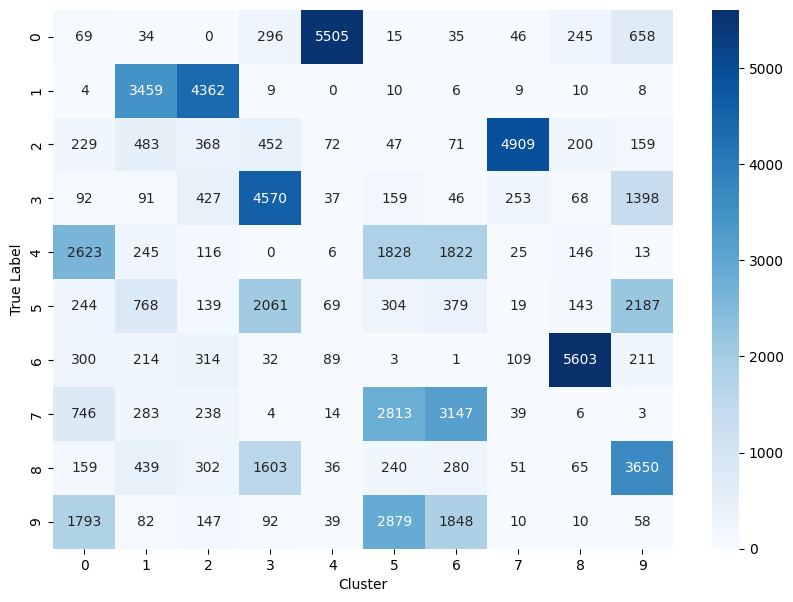

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_data, clusters)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.xlabel('Cluster')
plt.ylabel('True Label')
plt.show()


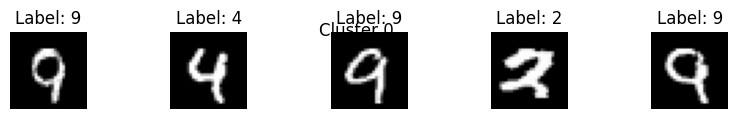

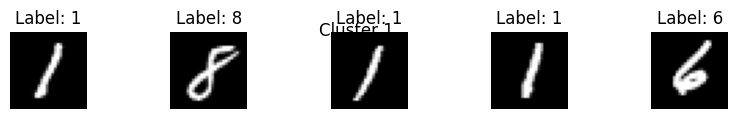

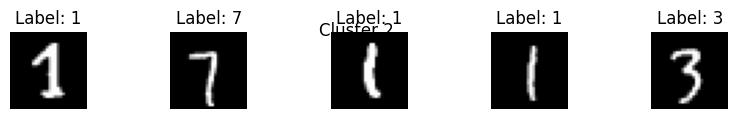

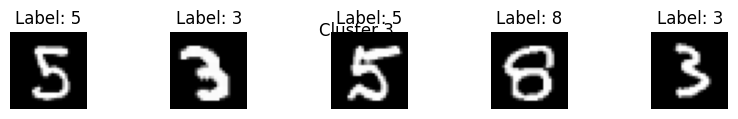

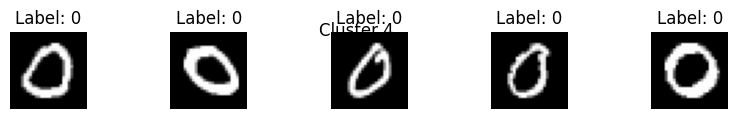

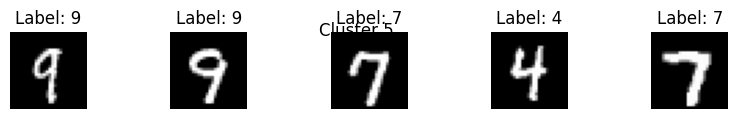

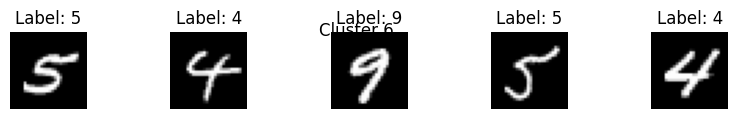

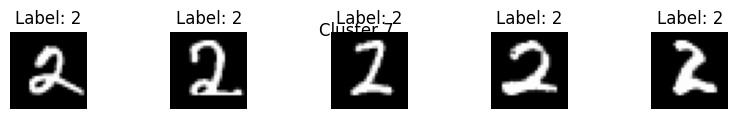

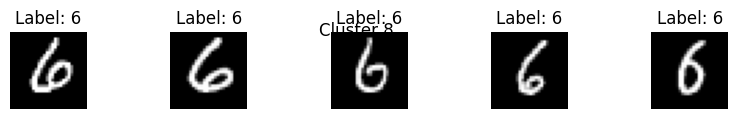

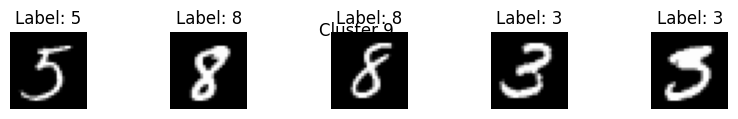

In [29]:
def plot_clusters(kmeans, x_data, clusters, y_data, samples=5):
    for i in range(kmeans.n_clusters):
        idxs = np.where(clusters == i)[0]
        selected_idxs = np.random.choice(idxs, samples, replace=False)
        plt.figure(figsize=(10, 1))
        for j, idx in enumerate(selected_idxs):
            plt.subplot(1, samples, j+1)
            plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
            plt.title(f'Label: {y_data[idx]}')
            plt.axis('off')
        plt.suptitle(f'Cluster {i}')
        plt.show()

plot_clusters(kmeans, x_data, clusters, y_data)


In [31]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette = silhouette_score(x_data, clusters)
print(f'Silhouette Score: {silhouette:.4f}')

davies_bouldin = davies_bouldin_score(x_data, clusters)
print(f'Davies-Bouldin Score: {davies_bouldin:.4f}')


Silhouette Score: 0.0559
Davies-Bouldin Score: 2.8855
